## Regression
Boston Housing Data

********************************************************
__Pending data from DatCamp__<br>
Work with __Gapminder data__ to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. The dataset is preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises,  will use all the features to build regression models.
*******************************************************

In [17]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
boston = pd.read_csv('data\\boston.csv')

In [18]:
boston[:5]

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# Create arrays for features and target variable

# remove target from training set and convert to numpy array
X = boston.drop('MEDV', axis = 1).values

# setup training set for single predictor regression
X_room = boston['RM'].values

# build target numpy array
y = boston['MEDV'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_room.shape))

# Reshape X and y
y = y.reshape(-1,1)
X_room = X_room.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X_room.shape))

Dimensions of y before reshaping: (506,)
Dimensions of X before reshaping: (506,)
Dimensions of y after reshaping: (506, 1)
Dimensions of X after reshaping: (506, 1)


## Scatter plot of single predictor vs. target

Text(0.5,0,'Number of rooms')

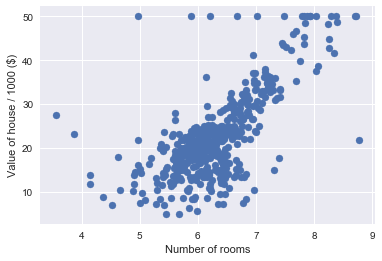

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_room, y)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')

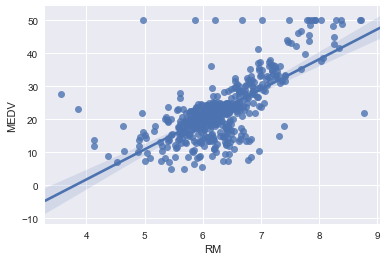

In [21]:
import seaborn as sns; sns.set(color_codes=True)

sns.regplot(x='RM', y="MEDV", data=boston)

## Fit & predict for regression
Using the 'fertility' feature of the Gapminder dataset, fit a linear regression and predict life expectancy (using just one feature). Since the goal is to predict life expectancy, the target variable  is 'life'. 

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2R2 score using sckit-learn's .score() method.

0.483525455991


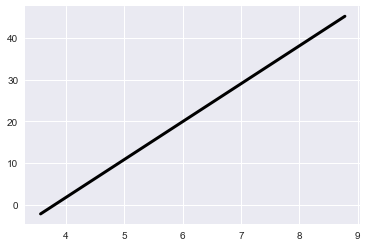

In [26]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model

# Create the regressor: reg
reg = linear_model.LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_room), max(X_room)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_room, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_room, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

## Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

In [29]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = linear_model.LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7112260057484953
Root Mean Squared Error: 4.6386899261728045


## 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectivel

In [30]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv =5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.3532759243958669


## K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

In [32]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

%timeit cvscores_3 = cross_val_score(reg, X, y, cv = 3)
%timeit cvscores_10 = cross_val_score(reg, X, y, cv = 10)



-1.5841985221
0.202528990061
3.38 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.8 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exploring the Gapminder Data with Seaborn
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is not true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!